## Importing Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## EDA and Visualization

In [10]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

We will drop the null values in the columbn 'Arrival Delay in Minutes'.

In [4]:
df_c=df.copy()
df.dropna(inplace=True)

Rows containing null values are dropped because there are few such rows in compared to total numvber of entries.

In [13]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(df[c].value_counts()))
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



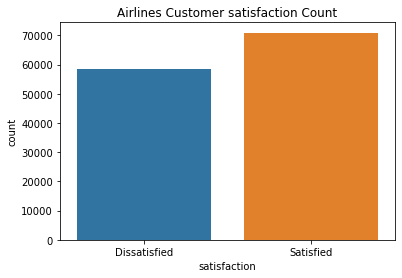

In [14]:
sn.countplot(x="satisfaction", data=df)
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

In our data, number of both satisfied and dissatisfied cutomer are almosrt equal. So, our datasetr is balanced.

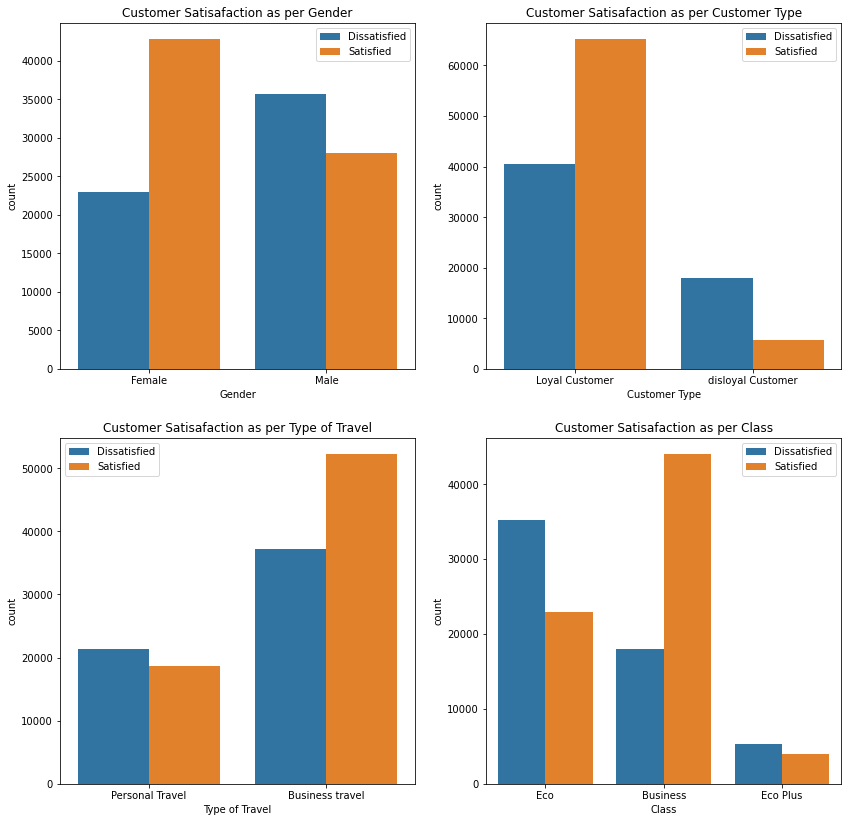

In [15]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
    for j in range(2):
        sn.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j])
        axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
        axs[i][j].legend(['Dissatisfied',"Satisfied"])
        c+=1

From the abovce charts, we can conbclude that:
* Comparitively, female customers are more satisfied than male customers.
* Loyal Customers are more satisfied than disloyal ones.
* People who travel for business purpose are more satisfied than ones who travel for personal purpose.
* More number of people travel in Business class and are also comparitively more satisfied than customers travelling in economy or economy plus class.

In [16]:
fg=sn.displot(df,x='Age',binwidth=0.55,hue='satisfaction')
fg.fig.set_figwidth(24.27)
fg.fig.set_figheight(14.7)
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

Customers of age group between 38 to 60 are more satisfied than customers of other age group.

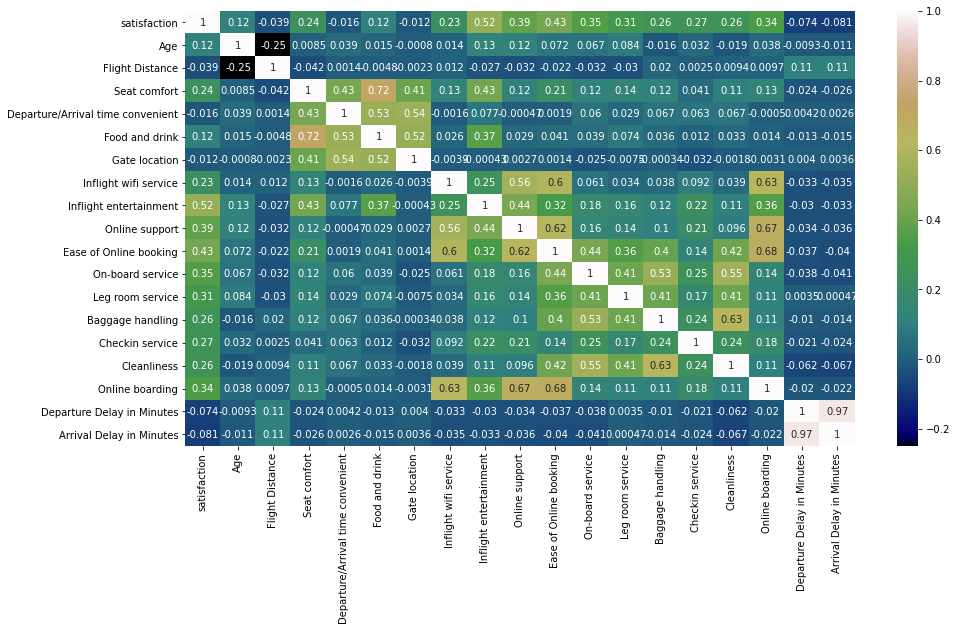

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sn.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()

The factors like Flight Distance, Departure/Arrival time convenient,Gate location,Departure Delay in Minutes and Arrival Delay in Minutes have very low impact on customer satisfaction. So, we are going to drop those columns to reduce model complexity.

In [18]:
df.drop(['Flight Distance','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

In [19]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,Female,Loyal Customer,65,Personal Travel,Eco,0,0,2,4,2,3,3,0,3,5,3,2
1,1,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,2,2,3,4,4,4,2,3,2
2,1,Female,Loyal Customer,15,Personal Travel,Eco,0,0,2,0,2,2,3,3,4,4,4,2
3,1,Female,Loyal Customer,60,Personal Travel,Eco,0,0,3,4,3,1,1,0,1,4,1,3
4,1,Female,Loyal Customer,70,Personal Travel,Eco,0,0,4,3,4,2,2,0,2,4,2,5


In [20]:
df.shape

(129487, 18)

In [21]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X.shape

(129487, 17)

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,3,4])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=np.float)

In [23]:
X.shape

(129487, 22)

## Model Selection

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=0)

sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [25]:
#function to plot learning curve for any classifier
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(X_train_sc,y_train)
pred_log1=log_reg1.predict(X_test_sc)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[4815 1067]
 [1087 5980]]
Accuracy is 0.8336551085025871


In [28]:
log_reg3=LogisticRegression(max_iter=2500)
log_reg3.fit(X_train,y_train)
pred_log3=log_reg3.predict(X_test)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log3))
print('Accuracy is\n', accuracy_score(y_test,pred_log3))

'''
pred_log_train=log_reg3.predict(X_train)
print("Train Scores")
print('Confusion Matrix is\n',confusion_matrix(y_train,pred_log_train))
print('Accuracy is', accuracy_score(y_train,pred_log_train))
'''

Test Scores
Confusion Matrix is
 [[4814 1068]
 [1087 5980]]
Accuracy is
 0.8335778824619662


'\npred_log_train=log_reg3.predict(X_train)\nprint("Train Scores")\nprint(\'Confusion Matrix is\n\',confusion_matrix(y_train,pred_log_train))\nprint(\'Accuracy is\', accuracy_score(y_train,pred_log_train))\n'

In [29]:
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train_minmax,y_train)
pred_log2=log_reg2.predict(X_test_minmax)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is', accuracy_score(y_test,pred_log2))

Confusion Matrix is
 [[5069  813]
 [1325 5742]]
Accuracy is 0.8348907251525214


Sacled data using MinMax scaling performed better than other scaling methods and unscaled data.

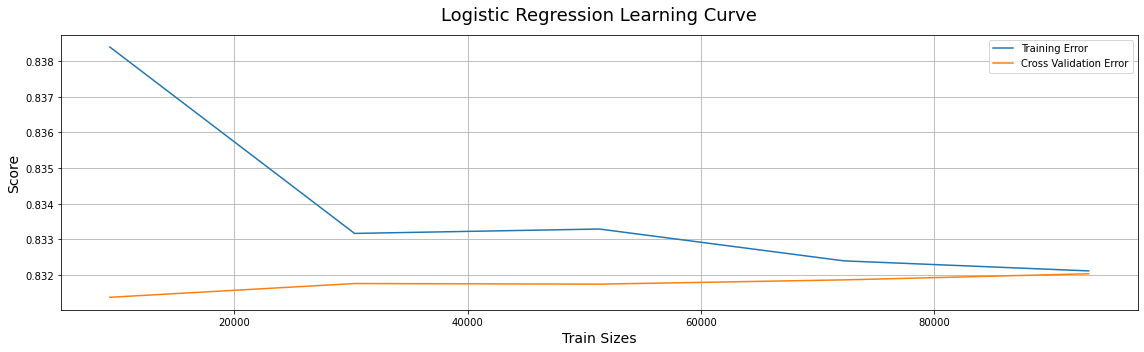

In [30]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_minmax, y_train, log_reg2,title)


As train size increase, trainining score and cross validation score are converging which means less deviation in accuracy.

## KNeighbours Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
for k in range(10,18):
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
    knn.fit(X_train_sc,y_train)
    pred_knn = knn.predict(X_test_sc)

    print("k=",k)
    print('Confusion Matrix is ',confusion_matrix(y_test,pred_knn))
    print('Accuracy is', accuracy_score(y_test,pred_knn))
    print('\n')

k= 10
Confusion Matrix is  [[5582  300]
 [ 741 6326]]
Accuracy is 0.9196076917136459


k= 11
Confusion Matrix is  [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


k= 12
Confusion Matrix is  [[5571  311]
 [ 739 6328]]
Accuracy is 0.9189126573480577


k= 13
Confusion Matrix is  [[5517  365]
 [ 665 6402]]
Accuracy is 0.9204571781604757


k= 14
Confusion Matrix is  [[5564  318]
 [ 731 6336]]
Accuracy is 0.9189898833886787


k= 15
Confusion Matrix is  [[5508  374]
 [ 658 6409]]
Accuracy is 0.9203027260792339


k= 16
Confusion Matrix is  [[5553  329]
 [ 728 6339]]
Accuracy is 0.9183720750637114


k= 17
Confusion Matrix is  [[5511  371]
 [ 669 6398]]
Accuracy is 0.9196849177542668




Knn algortihm performed best when value of k_neighjbours equals 11. So let's find the model's performance on both training and test sets.
Performance was bettwe with scaled data scaled using StandardScaler.

In [33]:
knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,y_train)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,knn_test))
print('Accuracy is', accuracy_score(y_test,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,knn_train))
print('Accuracy is', accuracy_score(y_train,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


For Train
Confusion Matrix is
  [[50106  2617]
 [ 4988 58827]]
Accuracy is 0.9347423158111517




In [ ]:
plt.figure(figsize = (16,5))
title = 'kNeighbours Learning Curve'
plotLearningCurves(X_train, y_train, knn,title)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(accuracy_score(y_test,pred_dtc))

Decision Tree classifier performed best when max_depth is set to 25, max_leaf_nodes to 1000 and using entropy as criterion. 

In [ ]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)
#pred_dtc=dtc.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

Cross validation score is increasing with increase in train size and also converging with training score. It means our model is learning well.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

rfc.fit(X_train_sc, y_train)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))

#0.9477466379221846
#0.9887918518192618

In [ ]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train, y_train, rfc,title)

We can see that as train sizes increases cross validation score and training score are converging. But still there is some deviation between them.

## Conclusion

In our proble to classify customers as satisfied or dissatisfied, best accuracy was achieved using RandomForest Classifier. The best train score and test score achieved are 0.98 and 0.95 respectively. 